In [ ]:
# EP2_Augmentation
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : Jose Vitor Pereira Garzon
# NUSP : 9267071
# Turma: MAC0417-145-2024
# Prof.: Ronaldo Fumio Hashimoto
# Monitor: Marcos Freitas Parra
##################################################################

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import imread
import os

from matplotlib import image
from matplotlib import pyplot

import pandas as pd
from tabulate import tabulate

import matplotlib.image as mpimg

import json
from cv2 import resize

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas tabulate

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib pillow

Note: you may need to restart the kernel to use updated packages.


# Criação do NormalizedDataSet. 
1min e 30s

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def histograma_equalizado(categoria, nome_arquivo, imagem_original):
    pasta_saida = 'NormalizedDataSet'  # Pasta de saída para as imagens processadas

    if not os.path.exists(pasta_saida):
        os.makedirs(pasta_saida)
    
    nome_base = os.path.splitext(os.path.basename(nome_arquivo))[0]
    nome_saida = os.path.join(pasta_saida, f"HistogramaEqua_{nome_base}.jpg")
    
    # Converter a imagem para um array NumPy
    if not isinstance(imagem_original, np.ndarray):
        imagem_original = np.array(imagem_original)
    
    # Calcular o histograma da imagem original
    hist, bins = np.histogram(imagem_original.flatten(), bins=256, range=(0, 256), density=True)
    
    # Calcular a função de distribuição acumulada (CDF)
    cdf = hist.cumsum()
    
    # Normalizar o CDF para o intervalo 0-255
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    
    # Aplicar a equalização de histograma usando o CDF normalizado
    imagem_equalizada = np.interp(imagem_original.flatten(), bins[:-1], cdf_normalized)
    
    # Redimensionar para o formato da imagem original e converter para uint8
    imagem_equalizada = imagem_equalizada.reshape(imagem_original.shape).astype(np.uint8)
    
    # Salvar imagem equalizada usando matplotlib
    plt.imshow(imagem_equalizada, cmap='gray')
    plt.axis('off')  # Desligar os eixos para não mostrar no gráfico
    plt.savefig(nome_saida, bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return nome_saida  # Retorna o nome do arquivo de saída

# Caminho para o arquivo JSON contendo os dados das imagens
caminho_arquivo_json = r'C:\Users\josef\Desktop\EP2\Metadados_AugmentedDataSet_Salvo.json'

# Carregar dados do arquivo JSON
with open(caminho_arquivo_json, 'r') as arquivo:
    image_data_AugmentedDataSet = json.load(arquivo)

# Novo dicionário de metadados para as imagens em escala de cinza
Metadados_NormalizedDataSet = {}

# Percorre os metadados e converte cada imagem para escala de cinza
for nome_imagem, dados_imagem in image_data_AugmentedDataSet.items():
    categoria = f"{dados_imagem['Fundo']}_{dados_imagem['Luminosidade']}"
    
    try:
        caminho_completo_imagem = dados_imagem['Caminho']  # Usar o caminho fornecido no JSON
        imagem_original = plt.imread(caminho_completo_imagem)
        
        # Chame a função histograma_equalizado para processar a imagem
        nome_saida = histograma_equalizado(categoria, caminho_completo_imagem, imagem_original)
        
        # Adicione informações ao Metadados_NormalizedDataSet
        Metadados_NormalizedDataSet[nome_saida] = {
            'Fundo': dados_imagem['Fundo'],
            'Luminosidade': dados_imagem['Luminosidade'],
            'Classes': dados_imagem['Classes'],
            'Processamento': 'Histograma Equalizado',
            'Caminho': os.path.abspath(nome_saida)  # Caminho absoluto para a imagem processada
        }
        
        # Salvar Metadados_NormalizedDataSet em um arquivo JSON
        saida_json = os.path.join(os.path.dirname(caminho_arquivo_json), "Metadados_NormalizedDataSet_Salvo.json")
        with open(saida_json, "w") as outfile:
            json.dump(Metadados_NormalizedDataSet, outfile, indent=2)
        
        print(f"Imagem '{nome_imagem}' Processada com sucesso e salva em '{nome_saida}'.")
    except Exception as e:
        print(f"Erro ao processar imagem '{nome_imagem}': {e}")

print("\nConversão concluída.")


Imagem 'Metadados_AugmentedDataSet\Contrast_Stretching_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg' Processada com sucesso e salva em 'NormalizedDataSet\HistogramaEqua_Contrast_Stretching_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg'.
Imagem 'Metadados_AugmentedDataSet\Laplaciano_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg' Processada com sucesso e salva em 'NormalizedDataSet\HistogramaEqua_Laplaciano_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg'.
Imagem 'Metadados_AugmentedDataSet\Exponencial_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg' Processada com sucesso e salva em 'NormalizedDataSet\HistogramaEqua_Exponencial_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg'.
Imagem 'Metadados_AugmentedDataSet\Log_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg' Processada com sucesso e salva em 'NormalizedDataSet\HistogramaEqua_Log_Cinza_Fundo Branco - Ilumi Dia_Claro - Classe A  (1).jpg'.
Imagem 'Metadados_Augmente

Clariou bastante os objetos das imagens que estavam no fundo preto, mesmo a imagem possuindo ruído em fundo preto, notei que os objetos das imagens em fundo preto foram bastante clareados e ficaram bem víziveis.
Aumentou bastante o ruído das imagens com iluminações escurecidas.
Os objetos com uma intensidade maior das imagens com luminosidade mais escurecida tiveram sua intensidade bem mais aumentanda, conforme a luminosidade vai escurecendo(Noite Escuro), como se estivessem radiantes em relação aos outros objetos.
Agora no laplaciano obtive mais ruido nas imagens e percebi que as imagens com luminosidade maiores tiveram os seus
objetos mais viziveis.


## Histograma médio de cada uma das iluminações OriginalGrayDataSet

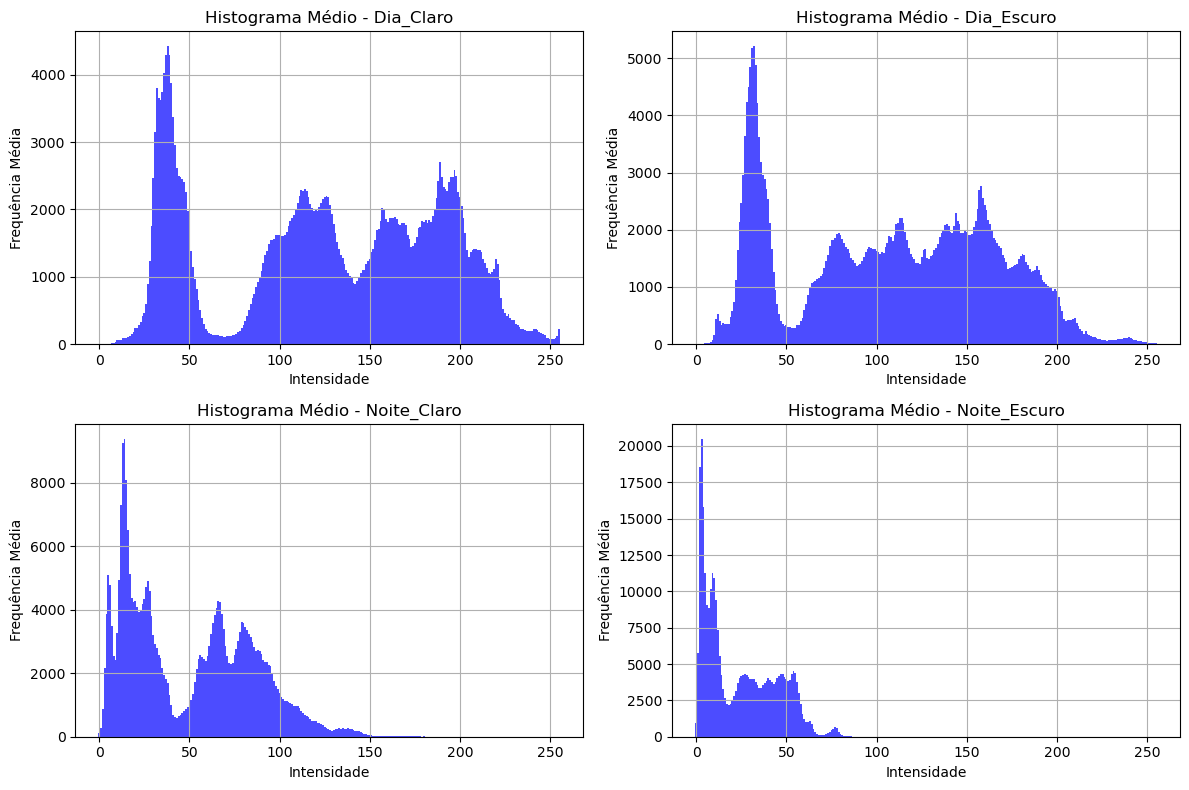

In [2]:
import matplotlib.image as mpimg

# Obtém o diretório atual do script
diretorio_atual = os.path.dirname(r'C:\Users\josef\Desktop\EP2\Metadados_AugmentedDataSet')

# Constrói o caminho para o arquivo JSON na pasta superior
caminho_arquivo_json = os.path.join(diretorio_atual, 'metadados_cinza_salvo.json')

# Abre e carrega o arquivo JSON
with open(caminho_arquivo_json, 'r') as arquivo:
    image_data_cinza = json.load(arquivo)

def calcular_histograma(imagem):
    # Calcula o histograma da imagem
    hist, bins = np.histogram(imagem.flatten(), bins=256, range=(0,256))
    return hist

def obter_nomes_imagens_por_luminosidade(metadados, luminosidade):
    nomes_imagens = []
    for nome_imagem, atributos in metadados.items():
        if atributos['Luminosidade'] == luminosidade:
            nomes_imagens.append(os.path.join(diretorio_atual, nome_imagem))  # Caminho completo para a imagem
    return nomes_imagens

def carregar_imagens(nomes_imagens):
    imagens_carregadas = []
    for nome_imagem in nomes_imagens:
        imagem = mpimg.imread(nome_imagem)
        imagens_carregadas.append(imagem)
    return imagens_carregadas

def calcular_histograma_medio(imagens):
    # Inicializa o histograma médio com zeros
    histograma_medio = np.zeros(256)
    
    # Calcula o histograma para cada imagem e soma ao histograma médio
    for imagem in imagens:
        hist = calcular_histograma(imagem)
        histograma_medio += hist
    
    # Divide pelo número de imagens para obter a média
    histograma_medio /= len(imagens)
    
    return histograma_medio

# Lista de luminosidades únicas nos metadados
luminosidades = ['Dia_Claro', 'Dia_Escuro', 'Noite_Claro', 'Noite_Escuro']  # Ajuste conforme as luminosidades disponíveis no seu arquivo JSON
# Calcular e exibir histogramas médios para cada luminosidade
plt.figure(figsize=(12, 8))

for i, luminosidade in enumerate(luminosidades, start=1):
    nomes_imagens = obter_nomes_imagens_por_luminosidade(image_data_cinza, luminosidade)
    imagens_carregadas = carregar_imagens(nomes_imagens)
    histograma_medio = calcular_histograma_medio(imagens_carregadas)
    
    # Exibe o histograma médio
    plt.subplot(2, 2, i)  # Ajuste o número de subplots conforme a quantidade de luminosidades
    plt.bar(range(256), histograma_medio, width=1.0, color='b', alpha=0.7)
    plt.title(f'Histograma Médio - {luminosidade}')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência Média')
    plt.grid(True)

plt.tight_layout()
plt.show()


Notei que as intensidades dos pixels do Histograma Médio da iluminação Noite Escuro são bem reduzidas já que o histograma não possui uma uniformidade entre as intensidades de pixels e a imagem do plot do Histograma Médio da iluminação Noite Escuro mostra que a maioria dos pixels não pasam da intensidade 100, mostrando que essa iluminação possui intensidedes de pixels menores em relação a outras iluminações.

Esse padrão de intensidedes de pixels menores também acontece na Iluminação Noite_Claro, mas contendo uma pequena quantidade de pixels que contém intensidades superioes a 100, mas que não passam dos 150 no gráfico.

Agora em relação ao Histograma Médio das Iluminaçãoes Dia_Claro e Dia_Escuro, acontece um espalhamento por todo o histograma, demonstrando uma maior quantidade de pixels de maiores intensidades que chegam até 255 no gráfico, já que essas iluminações possuem mais clareamento das imagens.
Porém a Iluminação Dia_Claro contém uma maior quantidade de pixels com intensidade entre 150 a 200, mostrando que possui uma iluminação um pouco maior nas imagens de Dia_Claro.


### Histograma médio de cada processamento diferente dentro do AugmentedDataSet

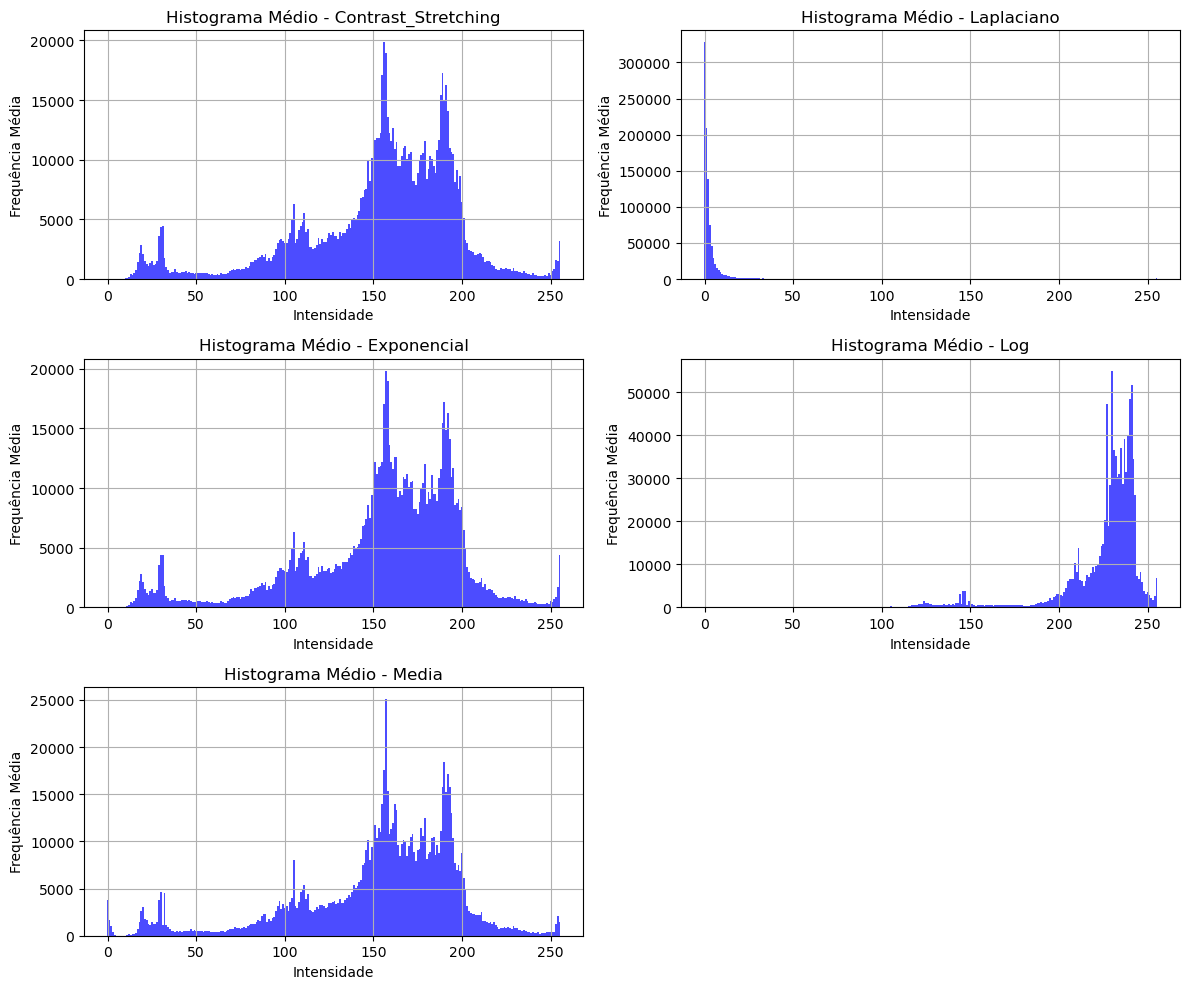

In [3]:
import matplotlib.image as mpimg
# Caminho para o arquivo JSON com os metadados
caminho_arquivo_json = r'C:\Users\josef\Desktop\EP2\Metadados_AugmentedDataSet_Salvo.json'

# Carregar os metadados do arquivo JSON
with open(caminho_arquivo_json, 'r') as arquivo:
    image_data_AugmentedDataSet = json.load(arquivo)

# Função para calcular o histograma de uma imagem
def calcular_histograma(imagem):
    hist, _ = np.histogram(imagem.flatten(), bins=256, range=(0,256))
    return hist

# Função para obter os nomes das imagens por tipo de processamento
def obter_nomes_imagens_por_processamento(metadados, tipo_processamento):
    nomes_imagens = []
    for chave, dados in metadados.items():
        if tipo_processamento in chave:
            nomes_imagens.append(dados['Caminho']) 
    return nomes_imagens

# Função para carregar imagens a partir de uma lista de nomes de arquivo
def carregar_imagens(nomes_imagens):
    imagens_carregadas = []
    for nome_imagem in nomes_imagens:
        try:
            imagem = mpimg.imread(nome_imagem)
            if imagem is None or len(imagem) == 0:
                print(f"Erro ao carregar imagem: {nome_imagem}. Imagem vazia ou não pode ser lida.")
                continue
            imagens_carregadas.append(imagem)
        except Exception as e:
            print(f"Erro ao carregar imagem: {nome_imagem}. {str(e)}")
    return imagens_carregadas

# Função para calcular o histograma médio de um conjunto de imagens
def calcular_histograma_medio(imagens):
    histograma_medio = np.zeros(256)
    total_imagens = len(imagens)
    
    for imagem in imagens:
        hist = calcular_histograma(imagem)
        histograma_medio += hist
    
    histograma_medio /= total_imagens
    
    return histograma_medio

# Tipos de processamento
tipos_processamento = ['Contrast_Stretching', 'Laplaciano', 'Exponencial', 'Log', 'Media']

# Configurar a figura para exibir os histogramas
plt.figure(figsize=(12, 10))

# exibir os histogramas médios
for i, tipo in enumerate(tipos_processamento, start=1):
    # Obter os nomes das imagens para o tipo de processamento
    nomes_imagens = obter_nomes_imagens_por_processamento(image_data_AugmentedDataSet, tipo)
    
    # Carregar as imagens
    imagens_carregadas = carregar_imagens(nomes_imagens)
    
    # Calcular o histograma médio das imagens carregadas
    histograma_medio = calcular_histograma_medio(imagens_carregadas)
    
    # Exibir o histograma médio
    plt.subplot(3, 2, i)
    plt.bar(range(256), histograma_medio, width=1.0, color='b', alpha=0.7)
    plt.title(f'Histograma Médio - {tipo}')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência Média')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Histograma Médio do NormalizedDataSet

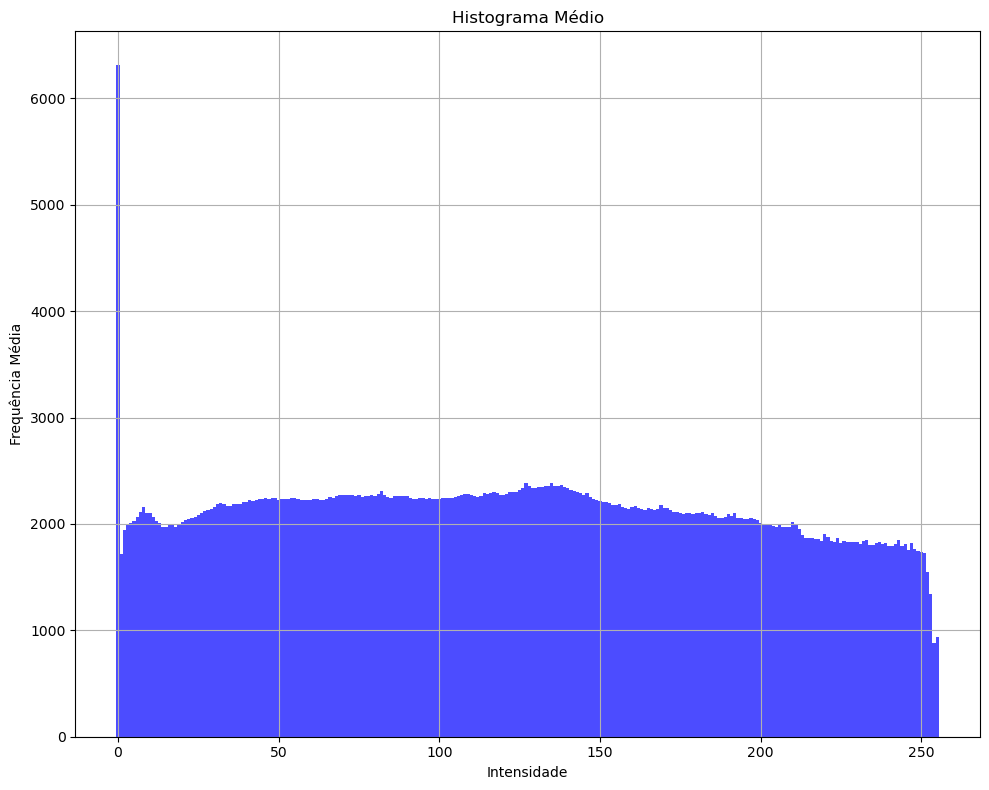

In [11]:
import matplotlib.image as mpimg
# Caminho para o arquivo JSON contendo os metadados normalizados
caminho_arquivo_json = r'C:\Users\josef\Desktop\EP2\Metadados_NormalizedDataSet_Salvo.json'

# Carregar os metadados do arquivo JSON
with open(caminho_arquivo_json, 'r') as arquivo:
    image_data_NormalizedDataSet = json.load(arquivo)

def calcular_histograma(imagem):
    # Calcula o histograma da imagem
    hist, bins = np.histogram(imagem.flatten(), bins=256, range=(0,256))
    return hist

def carregar_imagens_com_caminhos(caminhos_imagens):
    imagens_carregadas = []
    for caminho_imagem in caminhos_imagens:
        try:
            imagem = mpimg.imread(caminho_imagem)
            if imagem is None or len(imagem) == 0:  # Verifica se a imagem está vazia
                print(f"Erro ao carregar imagem: {caminho_imagem}. Imagem vazia ou não pode ser lida.")
                continue  # Pula para a próxima imagem
            imagens_carregadas.append(imagem)
        except Exception as e:
            print(f"Erro ao carregar imagem: {caminho_imagem}. {str(e)}")
    return imagens_carregadas

def calcular_histograma_medio(imagens):
    # Inicializa o histograma médio com zeros
    histograma_medio = np.zeros(256)
    
    # Calcula o histograma para cada imagem e soma ao histograma médio
    for imagem in imagens:
        hist = calcular_histograma(imagem)
        histograma_medio += hist
    
    # Divide pelo número de imagens para obter a média
    histograma_medio /= len(imagens)
    
    return histograma_medio

# Extrair os caminhos das imagens do JSON
caminhos_imagens = [dados_imagem['Caminho'] for dados_imagem in image_data_NormalizedDataSet.values()]

# Calcular e exibir histograma médio
plt.figure(figsize=(10, 8))

imagens_carregadas = carregar_imagens_com_caminhos(caminhos_imagens)
histograma_medio = calcular_histograma_medio(imagens_carregadas)

# Exibir o histograma médio
plt.bar(range(256), histograma_medio, width=1.0, color='b', alpha=0.7)
plt.title('Histograma Médio')
plt.xlabel('Intensidade')
plt.ylabel('Frequência Média')
plt.grid(True)

plt.tight_layout()
plt.show()


Para o Histograma Médio do NormalizedDataSet notei que as imagens indicaram uma distribuição igual  das intensidades de pixels, sem predominância de nenhuma faixa, indicando que as imagem possuem um histograma particular similar, com uma distribuição de pixels uniforme.